# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

NOMES:
* ALUNO/A 1: Douglas Nery Barbosa

Este _notebook_ é correspondente ao nosso segundo projeto, passado no dia 19/09/2024 e para entrega no dia 17/10/2024. Ele consiste em resolver um problema prático e responder a duas questões teóricas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um _upload_ deste _notebook_, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente e que eu conseguir executar o código de vocês sem dificuldades.

O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito.

# Parte teórica

## Exercício 01

O objetivo dessa questão é estudar um pouco da *Maldição da Dimensionalidade* (https://en.wikipedia.org/wiki/Curse_of_dimensionality). De modo mais concreto, queremos estudar a seguinte afirmação, de ordem um pouco esotética:

*À medida que $p$ cresce, o volume do hipercubo $\mathbb{H}^p = [0, 1]^p$ fica cada vez mais concentrado em sua "casca" do que em seu interior.*

Para isso, faça o que se pede abaixo.

a) Apesar de esotérica, fazer a prova de tal afirmação é bastante simples! Seja $\mathbb{H}^p_{\varepsilon}$ o hipercubo contido em $\mathbb{H}^p$ obtido removendo-se uma "gordurinha" de tamanho $\varepsilon$ de sua beirada, ou seja, $\mathbb{H}^p_{\varepsilon} = [\varepsilon/2, 1 - \varepsilon/2]^p$. Mostre que o volume de $\mathbb{H}^p_{\varepsilon}$ converge para zero, para todo $\varepsilon > 0$, quando $p \to \infty$.

[Resposta 1a](https://drive.google.com/file/d/1exaopF_VRtpsdAWKCKkmkRM_ChqsgDGB/view?usp=sharing)

b) Particularmente, para mim essa demonstação não me ajuda a ter nenhuma intuição sobre o resultado, e ele continua sendo esotérico! Porém, um dia tive uma revelação divina que cá partilho com vocês. Fixe algum valor de $0 < \varepsilon < 1$ à sua escolha e simule $n$ vetores de tamanho $p$ de observações de uma variável aleatória uniforme no intervalo $[0, 1]$. Qual é a proporção desses vetores que não têm nenhuma observação fora do hipercubo $\mathbb{H}^p_{\varepsilon}$? Faça uma explicação, baseada em tal experimento, para justificar empiricamente o resultado que você provou no item a).

In [ ]:
import numpy as np
p = [1,2,5,7,10,15,20,40,50]  #Dimensões
n = 100000  #vetores
epsilon = 0.1  #Valor epsilon

for dim in p:
    vetores = np.random.uniform(0, 1, (n, dim)) #gerando n vetores de p componentes uniformes no intervalo [0, 1]
    lim_inf = epsilon / 2
    lim_sup = 1 - epsilon / 2

    contagem = np.all((vetores >= lim_inf) & (vetores <= lim_sup), axis=1).sum()

    proporcao = contagem / n
    print(f"Proporção de vetores dentro do hipercubo para {dim} dimensões: {proporcao:0.2f}")

Proporção de vetores dentro do hipercubo para 1 dimensões: 0.90
Proporção de vetores dentro do hipercubo para 2 dimensões: 0.81
Proporção de vetores dentro do hipercubo para 5 dimensões: 0.59
Proporção de vetores dentro do hipercubo para 7 dimensões: 0.48
Proporção de vetores dentro do hipercubo para 10 dimensões: 0.35
Proporção de vetores dentro do hipercubo para 15 dimensões: 0.21
Proporção de vetores dentro do hipercubo para 20 dimensões: 0.12
Proporção de vetores dentro do hipercubo para 40 dimensões: 0.01
Proporção de vetores dentro do hipercubo para 50 dimensões: 0.01


Como as variáveis aleatórias são uniformes no intervalo
[
0
,
1
]
[0,1], a probabilidade de uma variável aleatória estar contida no subintervalo
[
𝜀
2
,
1
−
𝜀
2
]
[
2
ε
​
 ,1−
2
ε
​
 ] é dada pelo tamanho desse intervalo, ou seja,
1
−
𝜀
1−ε. Por exemplo, no caso de
𝜀
=
0.1
ε=0.1, temos que
1
−
0.1
=
0.9
1−0.1=0.9, o que reflete a probabilidade de uma única variável estar contida no intervalo.

Agora, como essas variáveis aleatórias são independentes, a probabilidade de que todas as
𝑝
p variáveis estejam dentro desse intervalo reduzido ao produto das probabilidades individuais,  
(
1
−
𝜀
)
𝑝
(1−ε)
p
 . Isso leva de volta ao que foi demonstrado no item (a), comprovando que, conforme
𝑝
p tende ao infinito, essa probabilidade converge para zero, confirmando que a maior parte do volume está concentrada nas bordas do hipercubo em dimensões elevadas.

## Exercício 02

O objetivo dessa questão é provar o que foi exibido sobre a maldição da dimensionalidade ao final da aula 4. Considere um conjunto de dados artificial de $n$ observações, onde cada observação consiste de um vetor de $p$ atributos, sendo cada entrada uniformemente distribuída em $(0, 1)$. Chamaremos tal conjunto de dados de $\mathbb{X}$. Sejam $\mathbf{X}^{(i)}$ e $\mathbf{X}^{(j)}$ duas linhas distintas da matriz $\mathbb{X}$, ou seja, dois vetores independentes de observações, ambos de tamanho $p$, consistindo de entradas independentes e identicamente distribuídas com distribuição uniforme no intervalo $(0, 1)$, estude o que acontece com a quantidade abaixo, chamada de *coeficiente de variação* à medida que $p \to \infty$:

\begin{equation*}
\frac{\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}}{\mathbb{E}\left[\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right]}.
\end{equation*}

Relacione esse resultado com o comportamento apresentado nos *slides* da aula 4.

[Resolução 2a](https://drive.google.com/file/d/1eyOm7uVkJK-7lXD5lm4QFBPPN-_mhWFO/view?usp=sharing)

Os resultados são compatíveis, demonstrando que a medida que a dimensão aumenta, a dispersão relativa das distâncias diminui. Isso comprova que em alta dimensão, todas as distâncias entre vetores se tornam aproximadamente as mesmas (tendendo a uma distância constante), o que está de acordo com o problema proposto na questão anterior.

# Parte prática

O objetivo da parte prática é analisar uma base de dados contendo informações sobre corridas de Uber, e tentar prever o valor da corrida com base em atributos de interesse. A base de dados encontra-se disponível [aqui](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).

O arquivo `.csv` tem poucas colunas: `fare_amount` é a coluna que desejamos prever, e temos também as colunas abaixo para usar como preditoras:
* `key` - _a unique identifier for each trip_
* `pickup_datetime` - _date and time when the meter was engaged_
* `passenger_count` - _the number of passengers in the vehicle (driver entered value)_
* `pickup_longitude` - _the longitude where the meter was engaged_
* `pickup_latitude` - _the latitude where the meter was engaged_
* `dropoff_longitude` - _the longitude where the meter was disengaged_
* `dropoff_latitude` - _the latitude where the meter was disengaged_

Note que a coluna `key` não será um preditor, já que contém somente uma variável de identificação da corrida. Porém, para que as outras colunas sejam propriamente utilizadas como preditoras, talvez seja necessário algum pré-processamento:
* Precisaremos converter as informações de latitude e longitude em distância ou nossos algoritmos serão capazes de fazê-lo "automaticamente"? Mesmo caso o façam, ter a distância logo de cara auxilia no processo de previsão?
* A coluna `pickup_datetime` tem muita informação útil, e pode ser convertida em muitas outras informações para te auxiliar na predição, por exemplo: dia da semana da corrida, se é feriado ou não, etc... porém, essas informações não são imediatas e vão requerer um certo "trabalho sujo" da sua parte, bem como um tico de ferramentas de processamento de texto :-)
* Note que, ao converter `pickup_datetime` para, digamos, dia da semana, será necessário converter essa informação em algo numérico. Aplicar `One Hot Encoding` é uma boa opção? Estude isso com carinho.

Alguns pontos que o seu trabalho deve conter:
* Análise exploratória bem aprofundada e interpretada: os nossos dados são muito interpretáveis! Além de fazer o que já esperamos (estudar correlações, visualizar histogramas, etc.), sua análise exploratória deve ser esclarecedora sobre distância entre ponto de partida e ponto de chegada, distribuição das corridas ao longo dos dias da semana, distribuição das corridas ao longo dos meses, estudar como (potencialmente) os atributos se relacionam com a resposta (sem e com pré-processamento), analisar (possível) influência do número de passageiros no preço da corrida, etc... Portanto, não basta fazer meia dúzia de gráficos para "cumprir tabela"! A análise exploratória deve informar muito sobre a base de dados e guiar os próximos passos!
* Criação de novos atributos a partir das colunas já presentes na base
* Treinamento e validação de todos os modelos de regressão que vimos até o momento, juntamente com uma interpretação de seus resultados
* Em particular, os coeficientes das regressões paramétricas devem ser interpretados, bem como a `feature_importance_` dos modelos baseados em árvores.
* Decisão de um "melhor" modelo para realizar previsões, com justificativa

Tome cuidado que a base é grande: poucos atributos porém muitas linhas! É bem provável que você precise tomar cuidado ao usar métodos pesados como `GridSearchCV`, ou até mesmo nos métodos `.fit()` dos nossos estimadores. Usar as coisas ingenuamente pode ser computacionalmente inviável. Seja sagaz em suas escolhas!


In [ ]:
pip install haversine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from haversine import haversine, Unit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2024.2/Aprendizado de Maquina/Projeto 2/uber.csv",sep=",",index_col=False)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
data = pd.DataFrame.copy(df)
data.drop(labels=['Unnamed: 0','key'], axis=1,inplace=True)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
print(data.shape)
data.describe()

(200000, 7)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
data.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
data.dropna(inplace=True)
data.shape

(199999, 7)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [ ]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['pickup_time'] = data['pickup_datetime'].dt.hour
new_column_order = ['pickup_datetime','day_of_week','pickup_time','pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_amount'
                    ]
data = data[new_column_order]
print(data.shape)
data.head()

(199999, 9)


,pickup_datetime,day_of_week,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06+00:00,3,19,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56+00:00,4,20,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00+00:00,0,21,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21+00:00,4,8,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00+00:00,3,17,-73.925023,40.744085,-73.973082,40.761247,5,16.0


In [ ]:
# Filtrar o DataFrame para manter apenas os registros com passenger_count entre 1 e 4
data = data[(data.passenger_count > 0) & (data.passenger_count < 5)]
data = data[(data.fare_amount > 0)] # removendo dados com valor negativo
data = data[(data['pickup_latitude'] > -90) & (data['pickup_latitude'] < 90) &
            (data['pickup_longitude'] > -180) & (data['pickup_longitude'] < 180)]

data = data[(data['dropoff_latitude'] > -90) & (data['dropoff_latitude'] < 90) &
            (data['dropoff_longitude'] > -180) & (data['dropoff_longitude'] < 180)]

print(data.shape)
data

(180981, 9)


,pickup_datetime,day_of_week,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06+00:00,3,19,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56+00:00,4,20,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00+00:00,0,21,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21+00:00,4,8,-73.976124,40.790844,-73.965316,40.803349,3,5.3
5,2011-02-12 02:27:09+00:00,5,2,-73.969019,40.755910,-73.969019,40.755910,1,4.9
...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00+00:00,6,10,-73.987042,40.739367,-73.986525,40.740297,1,3.0
199996,2014-03-14 01:09:00+00:00,4,1,-73.984722,40.736837,-74.006672,40.739620,1,7.5
199997,2009-06-29 00:42:00+00:00,0,0,-73.986017,40.756487,-73.858957,40.692588,2,30.9
199998,2015-05-20 14:56:25+00:00,2,14,-73.997124,40.725452,-73.983215,40.695415,1,14.5


In [ ]:
def distance_calculator(row):
    origin = (row['pickup_latitude'], row['pickup_longitude'])
    destination = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(origin, destination, unit=Unit.KILOMETERS)

data['distance'] = data.apply(distance_calculator, axis=1)
data = data[(data.distance > 0)]
data

,pickup_datetime,day_of_week,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,distance
0,2015-05-07 19:52:06+00:00,3,19,-73.999817,40.738354,-73.999512,40.723217,1,7.5,1.683325
1,2009-07-17 20:04:56+00:00,4,20,-73.994355,40.728225,-73.994710,40.750325,1,7.7,2.457593
2,2009-08-24 21:45:00+00:00,0,21,-74.005043,40.740770,-73.962565,40.772647,1,12.9,5.036384
3,2009-06-26 08:22:21+00:00,4,8,-73.976124,40.790844,-73.965316,40.803349,3,5.3,1.661686
8,2012-02-17 09:32:00+00:00,4,9,-73.975187,40.745767,-74.002720,40.743537,1,9.7,2.332714
...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00+00:00,6,10,-73.987042,40.739367,-73.986525,40.740297,1,3.0,0.112210
199996,2014-03-14 01:09:00+00:00,4,1,-73.984722,40.736837,-74.006672,40.739620,1,7.5,1.875053
199997,2009-06-29 00:42:00+00:00,0,0,-73.986017,40.756487,-73.858957,40.692588,2,30.9,12.850337
199998,2015-05-20 14:56:25+00:00,2,14,-73.997124,40.725452,-73.983215,40.695415,1,14.5,3.539720


In [ ]:
features = ['day_of_week','pickup_time','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance']

In [ ]:
data[[*features, 'fare_amount']].corr()

,day_of_week,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount
day_of_week,1.000000,-0.085526,0.003596,-0.006065,0.003224,-0.005475,0.067982,-0.003922,0.005929
pickup_time,-0.085526,1.000000,0.003012,-0.002655,0.001374,-0.002400,0.027916,0.000204,-0.021026
pickup_longitude,0.003596,0.003012,1.000000,-0.933229,0.523948,-0.629466,-0.000432,0.519625,0.016650
pickup_latitude,-0.006065,-0.002655,-0.933229,1.000000,-0.642783,0.785471,0.000811,-0.343466,-0.013467
dropoff_longitude,0.003224,0.001374,0.523948,-0.642783,1.000000,-0.940659,-0.004036,0.450298,0.018411
dropoff_latitude,-0.005475,-0.002400,-0.629466,0.785471,-0.940659,1.000000,0.002888,-0.292282,-0.015390
passenger_count,0.067982,0.027916,-0.000432,0.000811,-0.004036,0.002888,1.000000,-0.001123,0.015731
distance,-0.003922,0.000204,0.519625,-0.343466,0.450298,-0.292282,-0.001123,1.000000,0.028141
fare_amount,0.005929,-0.021026,0.016650,-0.013467,0.018411,-0.015390,0.015731,0.028141,1.000000


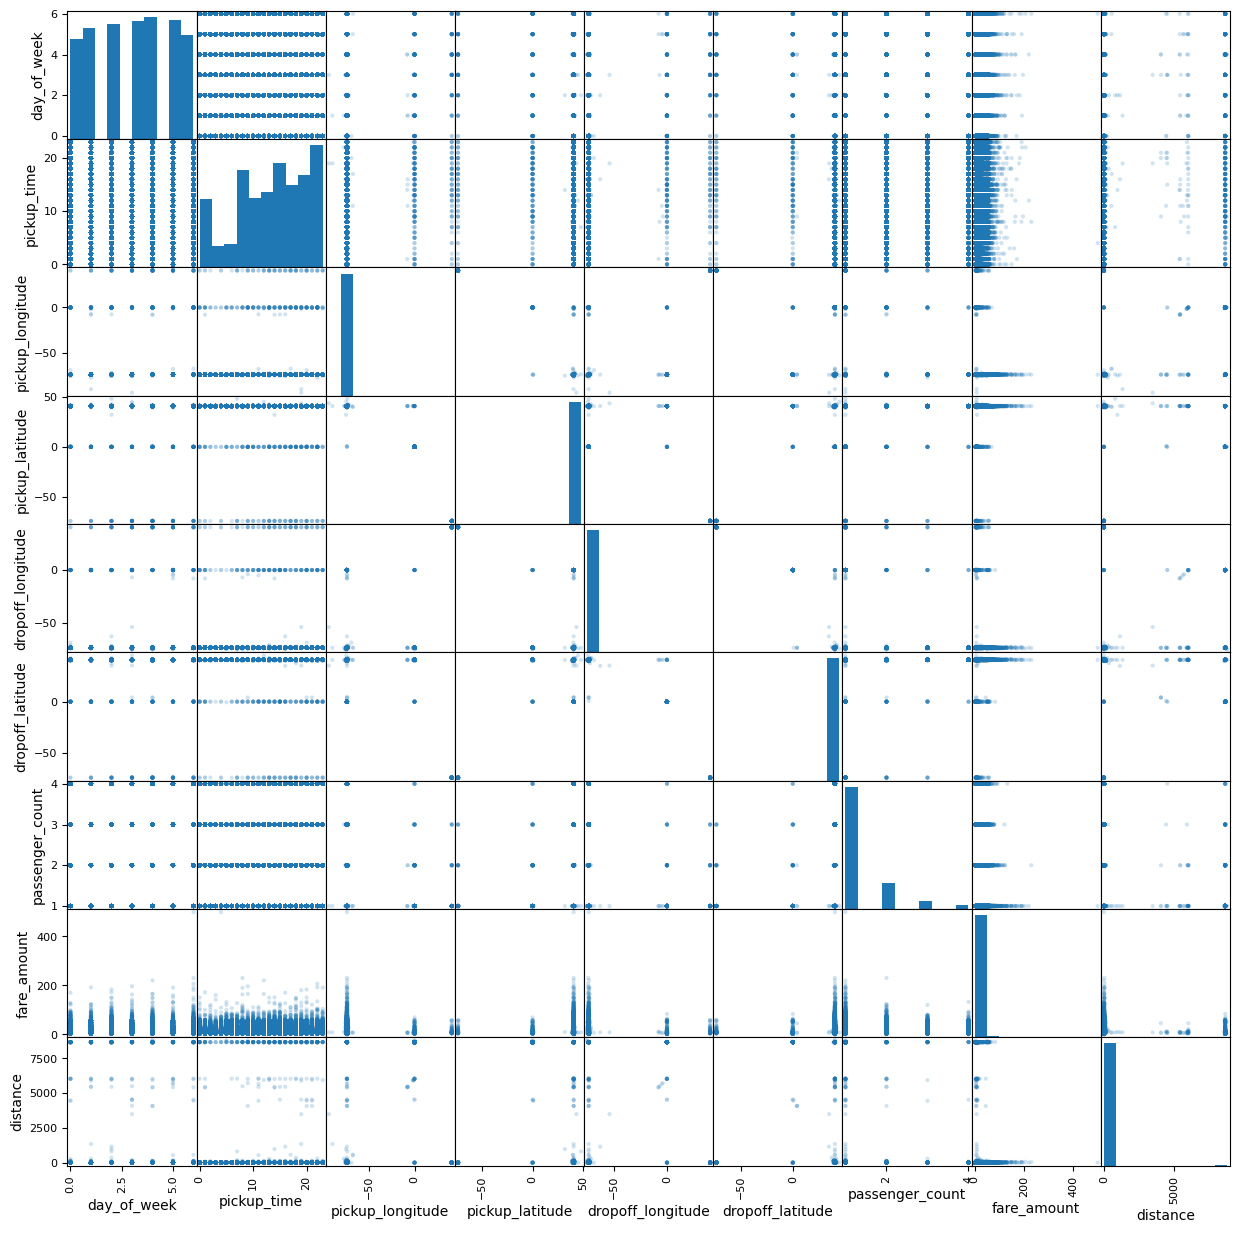

In [ ]:
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

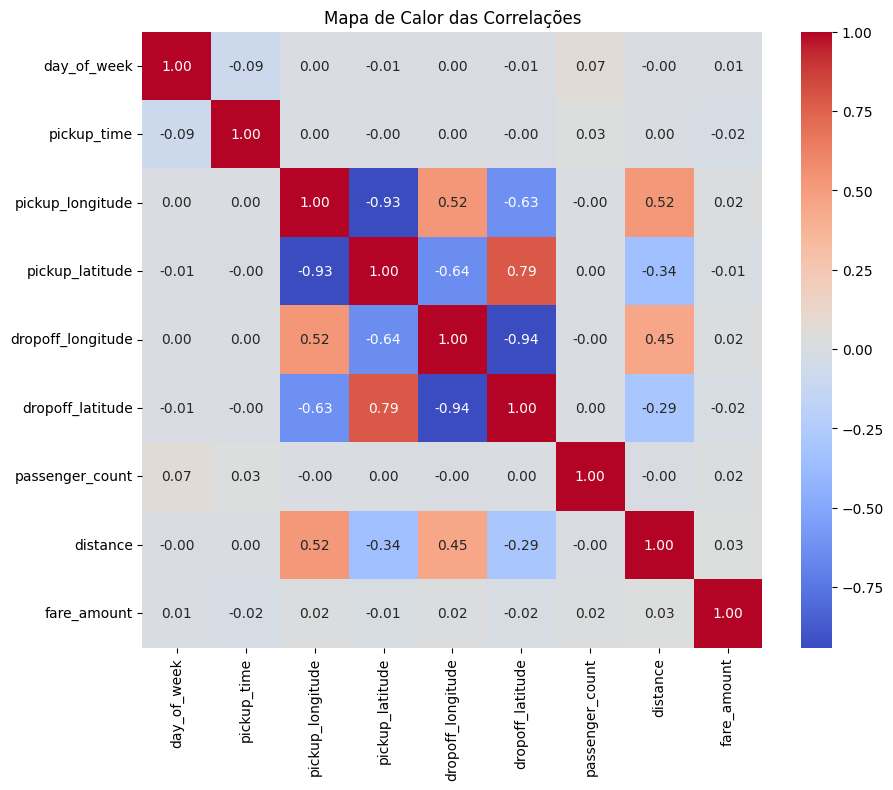

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[[*features, 'fare_amount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()


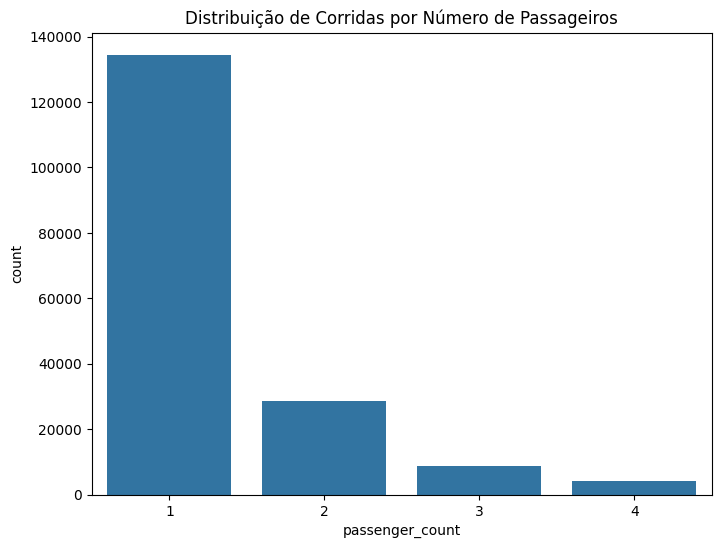

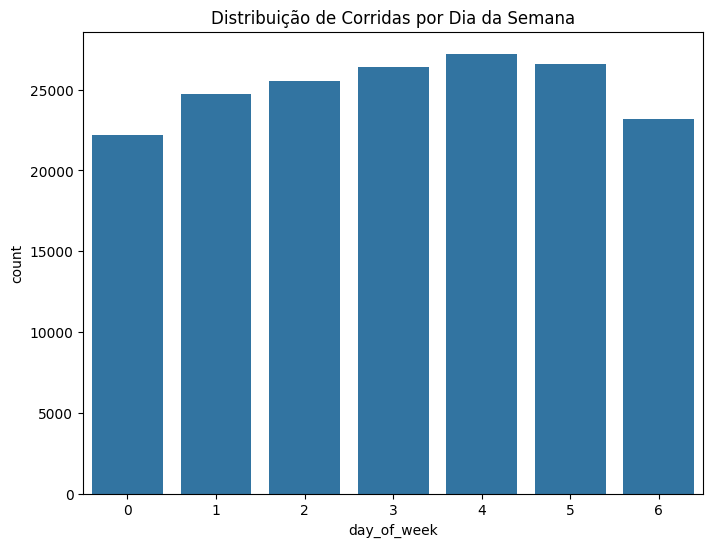

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='passenger_count', data=data)
plt.title('Distribuição de Corridas por Número de Passageiros')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='day_of_week', data=data)
plt.title('Distribuição de Corridas por Dia da Semana')
plt.show()

In [ ]:
data['pickup_month'] = data['pickup_datetime'].dt.month
new_df = data[['day_of_week', 'pickup_month','passenger_count','fare_amount']]
new_df

<ipython-input-21-80335fedd262>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pickup_month'] = data['pickup_datetime'].dt.month


,day_of_week,pickup_month,passenger_count,fare_amount
0,3,5,1,7.5
1,4,7,1,7.7
2,0,8,1,12.9
3,4,6,3,5.3
8,4,2,1,9.7
...,...,...,...,...
199995,6,10,1,3.0
199996,4,3,1,7.5
199997,0,6,2,30.9
199998,2,5,1,14.5


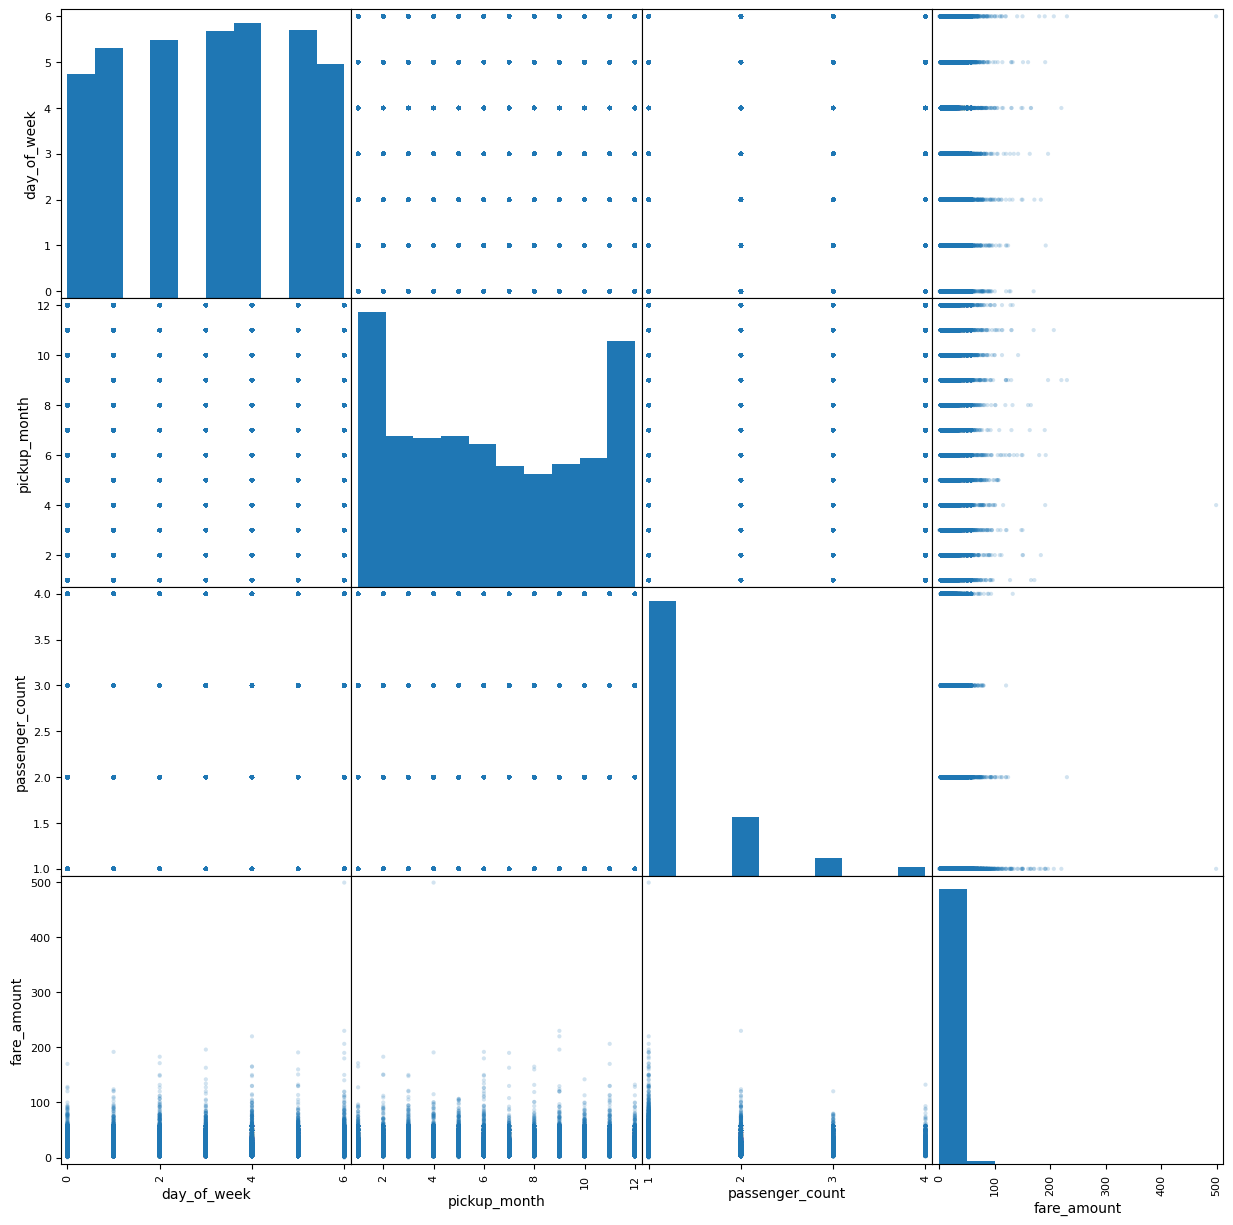

In [ ]:
scatter_matrix(new_df, alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

In [ ]:
data[['day_of_week', 'pickup_month','passenger_count','fare_amount']].corr()

,day_of_week,pickup_month,passenger_count,fare_amount
day_of_week,1.000000,-0.007919,0.067982,0.005929
pickup_month,-0.007919,1.000000,0.010812,0.023541
passenger_count,0.067982,0.010812,1.000000,0.015731
fare_amount,0.005929,0.023541,0.015731,1.000000


In [ ]:
feat_1 = ['day_of_week','pickup_time','pickup_month','passenger_count','distance']
feat_2 = ['day_of_week','pickup_time','pickup_month','passenger_count','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude']
X1 = data[feat_1] #features com a distância
X2 = data[feat_2]
y = data['fare_amount']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=3)

### KNN

In [ ]:
KNN = KNeighborsRegressor()
param_grid_KNN = {"n_neighbors": range(1, 31)}
KNNCV = GridSearchCV(KNN, param_grid = param_grid_KNN,
                     scoring='neg_mean_squared_error', cv = 4)
KNNCV.fit(X1_train, y1_train)
print(KNNCV.best_estimator_)

KNeighborsRegressor(n_neighbors=28)


In [ ]:
y_pred = KNNCV.predict(X1_test)
mse = MSE(y1_test, y_pred)
mae = MAE(y1_test, y_pred)
r2_score = r2(y1_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2_score)

Mean Squared Error (MSE): 22.99674982300655
Mean Absolute Error (MAE): 2.345377143182021
R-squared (R2): 0.7583598377466317


### Decision Tree

In [ ]:
DTR = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 5)
param_grid_DTR = {"ccp_alpha": [0.0001, 0.0001, 0.001, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2]}
DTRCV = GridSearchCV(DTR, param_grid = param_grid_DTR, scoring='neg_mean_squared_error', cv = 4)

DTRCV.fit(X1_train,y1_train)
print(DTRCV.best_estimator_)
best_model = DTRCV.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.08, min_samples_leaf=5)


In [ ]:
y1_pred = best_model.predict(X1_test)


mse = MSE(y1_test, y1_pred)
mae = MAE(y1_test, y1_pred)
R2 = r2(y1_test, y1_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {R2}")

MSE: 22.136024994461575
MAE: 2.4026855505593803
R²: 0.7674039717579969


In [ ]:
importances = best_model.feature_importances_

# Exibir importâncias das features
for feature, importance in zip(X1_train.columns, importances):
    print(f"{feature}: {importance:.4f}")

day_of_week: 0.0024
pickup_time: 0.0044
pickup_month: 0.0000
passenger_count: 0.0000
distance: 0.9932


### Linear Regression

In [ ]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline_lr.fit(X1_train, y1_train)

y_pred_lr = pipeline_lr.predict(X1_test)

mse_lr = MSE(y1_test, y_pred_lr)
mae_lr = MAE(y1_test, y_pred_lr)
r2_lr = r2(y1_test, y_pred_lr)

print("### Regressão Linear ###")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")

### Regressão Linear ###
Mean Squared Error (MSE): 94.9661
Mean Absolute Error (MAE): 6.0086
R-squared (R2): 0.0021


In [ ]:
coefficients = pipeline_lr.named_steps['lr'].coef_
intercept = pipeline_lr.named_steps['lr'].intercept_

print("Intercepto:", intercept)
for feature, coef in zip(X1_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Intercepto: 11.346107012905792
day_of_week: 0.0230
pickup_time: -0.1692
pickup_month: 0.2386
passenger_count: 0.1644
distance: 0.2805


### Ridge

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X1_train, y1_train)

# Acessando os coeficientes
ridge_coef = ridge.coef_

# Criando um DataFrame para visualizar os coeficientes
ridge_coef_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Ridge Coefficient': ridge_coef
})

print(ridge_coef_df)

           Feature  Ridge Coefficient
0      day_of_week           0.011810
1      pickup_time          -0.025978
2     pickup_month           0.069358
3  passenger_count           0.242270
4         distance           0.000729


In [ ]:
y_pred = ridge.predict(X1_test)

mse = MSE(y1_test, y_pred)
mae = MAE(y1_test, y_pred)
R2 = r2(y1_test, y_pred)

print("### Ridge ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {R2:.4f}")

### Ridge ###
Mean Squared Error (MSE): 94.9661
Mean Absolute Error (MAE): 6.0086
R-squared (R2): 0.0021


### Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X1_train, y1_train)

# Acessando os coeficientes
lasso_coef = lasso.coef_

# Criando um DataFrame para visualizar os coeficientes
lasso_coef_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Lasso Coefficient': lasso_coef
})

print(lasso_coef_df)

           Feature  Lasso Coefficient
0      day_of_week           0.000000
1      pickup_time          -0.023334
2     pickup_month           0.061276
3  passenger_count           0.027072
4         distance           0.000728


In [ ]:
y_pred = lasso.predict(X1_test)

mse = MSE(y1_test, y_pred)
mae = MAE(y1_test, y_pred)
R2 = r2(y1_test, y_pred)

print("### Lasso ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {R2:.4f}")

### Lasso ###
Mean Squared Error (MSE): 94.9818
Mean Absolute Error (MAE): 6.0088
R-squared (R2): 0.0020


In [ ]:
coef_comparison = pd.DataFrame({
    'Feature': X1_train.columns,
    'Ridge Coef': ridge.coef_,
    'Lasso Coef': lasso.coef_
})

print(coef_comparison)

           Feature  Ridge Coef  Lasso Coef  ElasticNet Coef
0      day_of_week    0.011810    0.000000         0.001761
1      pickup_time   -0.025978   -0.009282        -0.024700
2     pickup_month    0.069358    0.010771         0.065044
3  passenger_count    0.242270    0.000000         0.122236
4         distance    0.000729    0.000724         0.000728


### Random Forest

In [ ]:
param_grid = {'n_estimators': [40, 90,100]}

rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 5)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X1_train, y1_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor MSE: {grid_search.best_score_}")

Melhores parâmetros: {'n_estimators': 100}
Melhor MSE: -22.894404753590575


In [ ]:
y_pred = grid_search.best_estimator_.predict(X1_test)
mse = MSE(y1_test, y_pred)
mae = MAE(y1_test, y_pred)
R2 = r2(y1_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {R2}")

Mean Squared Error (MSE): 21.517206581419195
Mean Absolute Error (MAE): 2.33985746803676
R-squared (R²): 0.7739062550321028


In [ ]:
rf = RandomForestRegressor()

rf.fit(X1_train, y1_train)
y_pred_rf = rf.predict(X1_test)

mse_rf = MSE(y1_test, y_pred_rf)
mae_rf = MAE(y1_test, y_pred_rf)
r2_rf = r2(y1_test, y_pred_rf)

print(f"RandomForest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}")


RandomForest - MSE: 22.73836819326738, MAE: 2.450933663084883, R²: 0.7610748030966917


### Resultados

| **Modelo**                | **MSE (Mean Squared Error)** | **MAE (Mean Absolute Error)** | **R² (R-squared)** |
|---------------------------|------------------------------|-------------------------------|--------------------|
| K-Nearest Neighbors (KNN) | 22.99                        | 2.34                          | 0.758              |
| Decision Tree              | 24.12                        | 2.45                          | 0.746              |
| Random Forest              | 21.51                        | 2.33                          | 0.774              |
| Linear Regression          | 94.96                        | 6.00                          | 0.002              |
| Ridge                      | 94.96                        | 6.00                          | 0.002              |
| Lasso                      | 94.98                        | 6.00                          | 0.002              |


Durante minha análise percebi, que nesse contexto, é importante